In [1]:
import os
import random
import numpy as np, pandas as pd
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as T
import torchvision.datasets as datasets
from torchvision.io import read_image

from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image

torch.manual_seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Unzipping

In [4]:
from zipfile import ZipFile 

file = "/content/drive/MyDrive/colab_notebooks/Image_Proc/processed.zip"
  
with ZipFile(file, 'r') as z: 
    z.extractall() 
    print('Done!')

Done!


## Image Visualization for Pre-processing

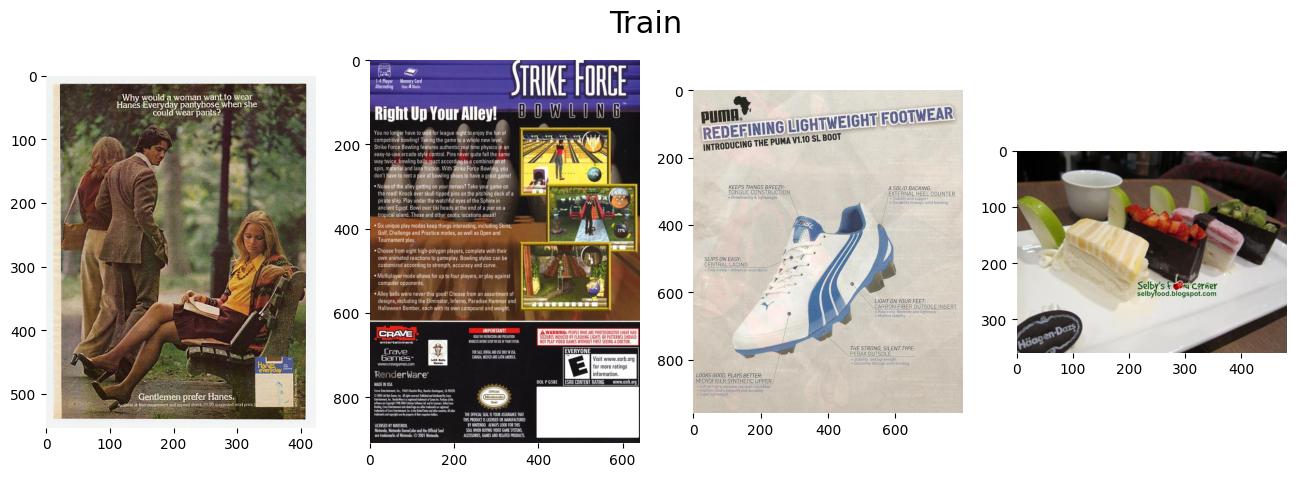

In [12]:
train = '/content/images/train/'
img_path_train = os.listdir(train)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Train", size=22)

for i,image in enumerate(img_path_train[:4]):
    img = read_image(train + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

### Image plotting function

In [13]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap = 'gray', **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.tight_layout()

plt.rcParams["figure.figsize"] = (20,3)

### Single Transform done to compare Orignal Image with Final Image

In [14]:
orig_img = Image.open(train + img_path_train[0])
# orig_img_train = T.ToPILImage()(orig_img)

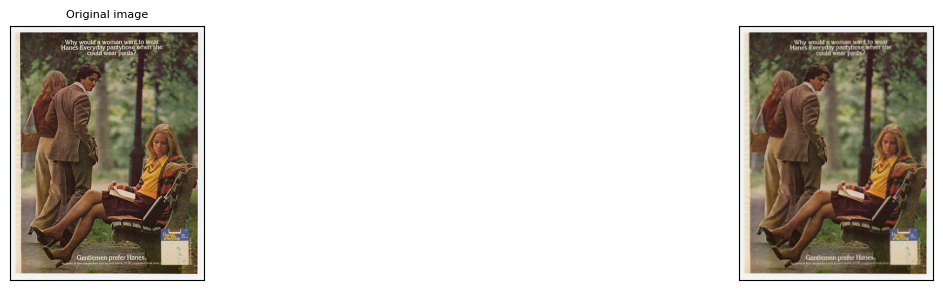

In [15]:
# Simple Transform applied to Resize
train_resize = transforms.Compose([transforms.Resize(224)])
resized_images = [train_resize(orig_img) for _ in range(1)]
plot(resized_images)

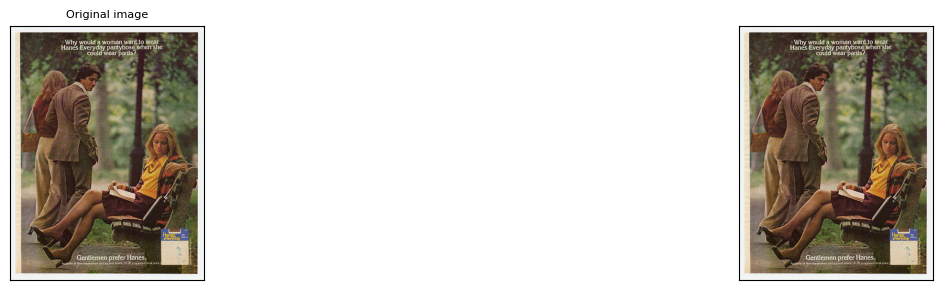

In [23]:
# simple transform applied for changing contrast 
train_contrast = transforms.RandomAutocontrast()
contrast_images = [train_contrast(orig_img) for _ in range(1)]
plot(contrast_images)

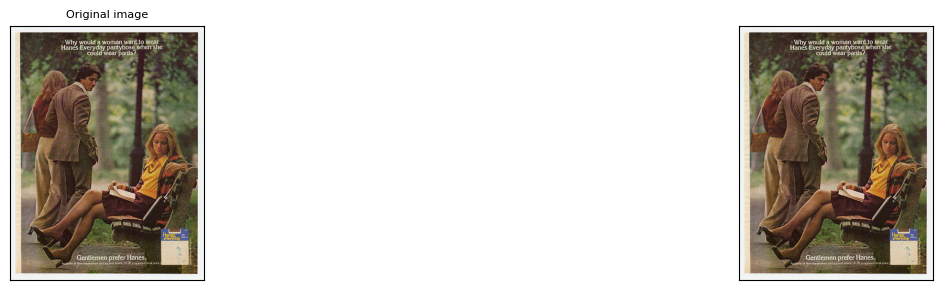

In [24]:
# simple transform applied for auto-sharpness
train_sharpness_adjuster= T.RandomAdjustSharpness(sharpness_factor=5)
sharpened_imgs = [train_sharpness_adjuster(orig_img) for _ in range(1)]
plot(sharpened_imgs)

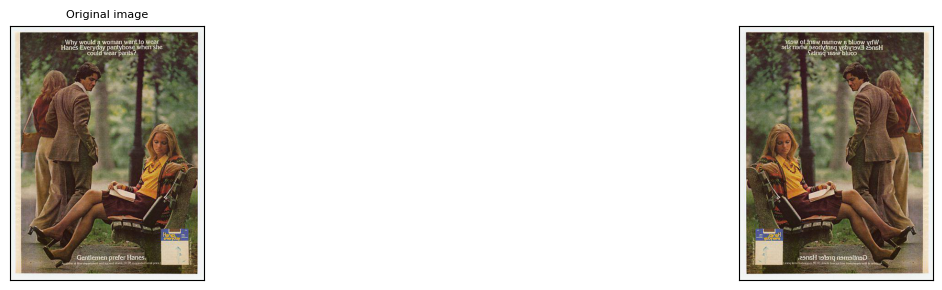

In [25]:
# simple transform applied for horizontal flips
train_hflip = transforms.RandomHorizontalFlip(p=0.8)
transformed_imgs = [train_hflip(orig_img) for _ in range(1)]
plot(transformed_imgs)

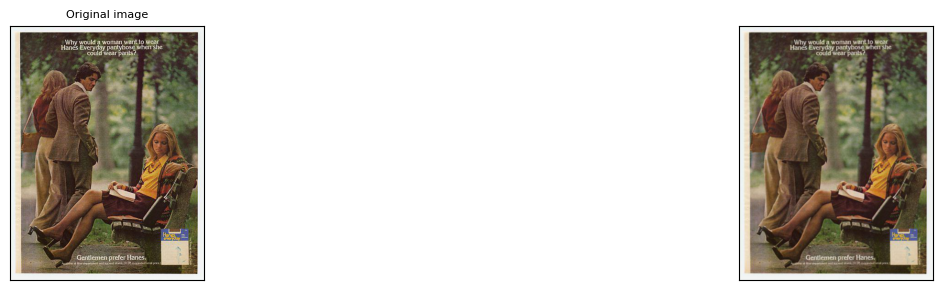

In [26]:
# Simple Transform Applied for Gaussian Blur
train_gaussian_blurrer = transforms.GaussianBlur(kernel_size=(5,5), sigma=0.7)
gaussian_blurred_images = [train_gaussian_blurrer(orig_img) for _ in range(1)]
plot(gaussian_blurred_images)

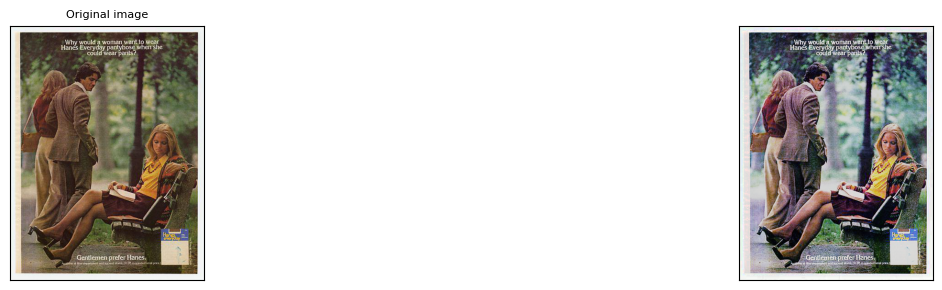

In [16]:
# Functional Transform applied for Histogram Equalization
blurred_imgs = [transforms.functional.equalize(orig_img) for _ in range(1)]
plot(blurred_imgs)

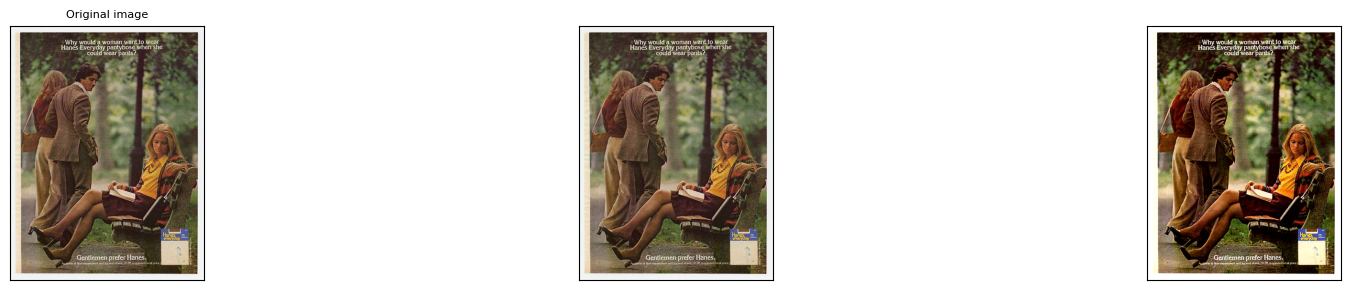

In [17]:
# Functional transform applied for adjusting contrast to a value
train_contrast = T.functional.adjust_contrast(orig_img, 1.5) # 0 gives a solid gray image, 1 gives the original image while 2 increases the contrast by a factor of 2.
constrasted_imgs = [orig_img, train_contrast]
plot(constrasted_imgs)

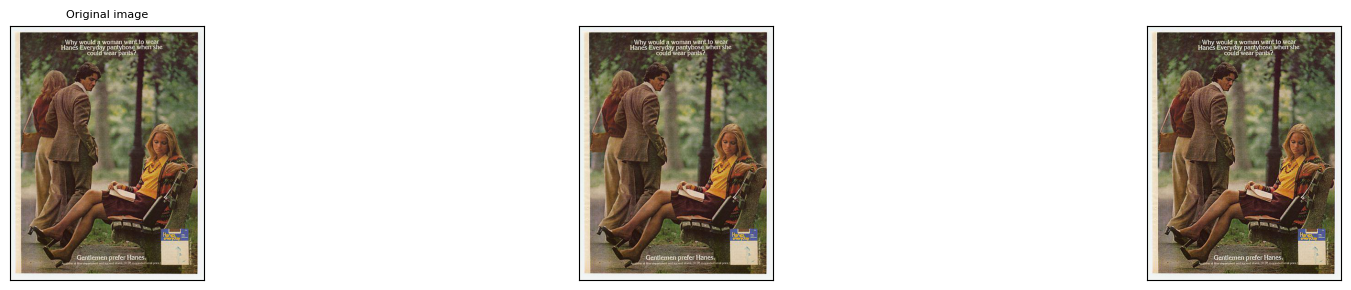

In [18]:
# Functional transform applied for adjusting sharpness to a value
train_sharpness = T.functional.adjust_sharpness(orig_img, 1.5) # 0 gives a blurred image, 1 gives the original image while 2 increases the contrast by a factor of 2.
sharpened_imgs = [orig_img, train_sharpness]
plot(sharpened_imgs)

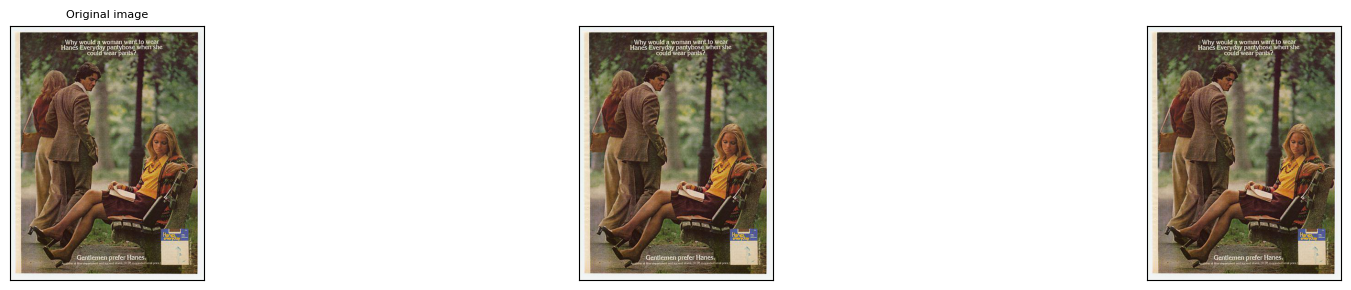

In [19]:
# Functional transform applied for adjusting brightness to a value
train_brightness = T.functional.adjust_brightness(orig_img, 1)
brightened_imgs = [orig_img, train_brightness]
plot(brightened_imgs)

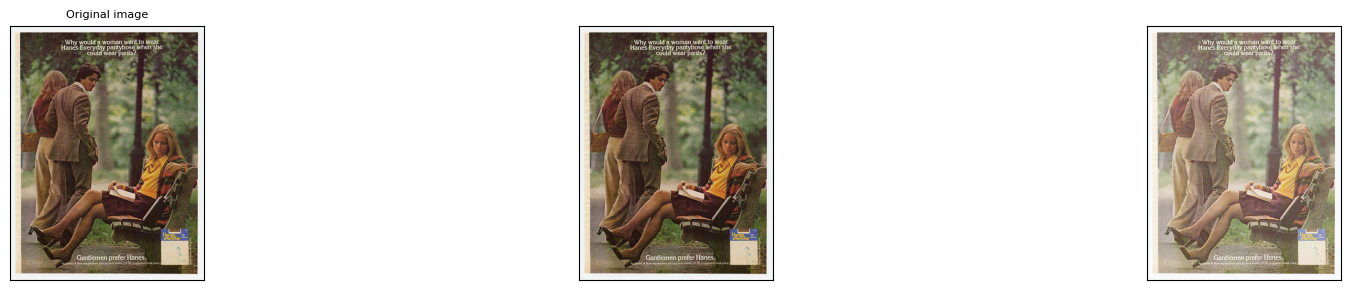

In [20]:
# Functional transform applied for adjusting gamma to a value
train_gamma = T.functional.adjust_gamma(orig_img, 0.5, 1 ) # gamma greater than 1 will make shadows darker, while gamma smaller than 1 make dark regions lighter.
gamma_imgs = [orig_img, train_gamma]
plot(gamma_imgs)

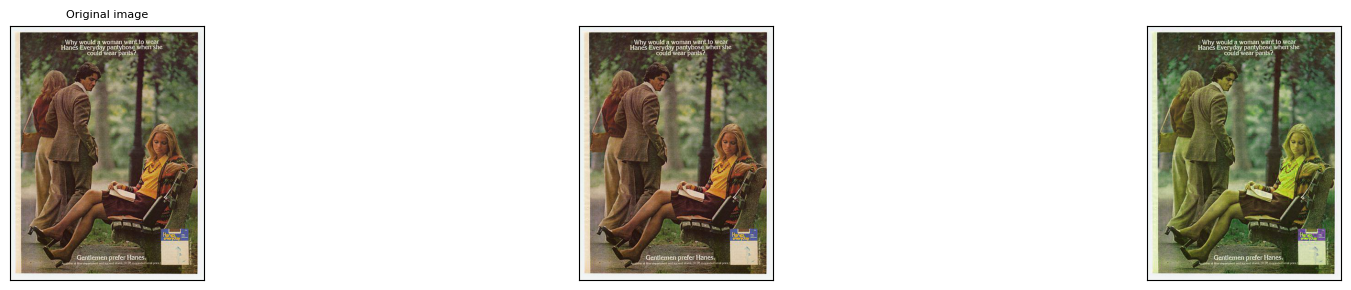

In [21]:
# Functional transform applied for adjusting hue to a value
train_hue = T.functional.adjust_hue(orig_img, 0.1) # Must be in the interval [-0.5, 0.5]. 0 means no shift.
hue_imgs = [orig_img, train_hue]
plot(hue_imgs)

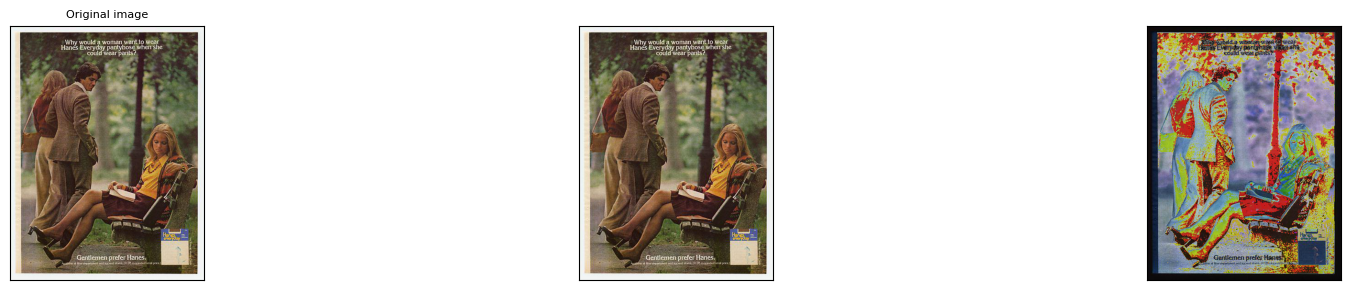

In [22]:
# Functional transform applied for solarizing values that is inverting all pixel values above a threshold.
train_solarize = T.functional.solarize(orig_img, 50)
solarize_imgs = [orig_img, train_solarize]
plot(solarize_imgs)